In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
data=pd.read_csv("adm_data.csv")
data.columns=data.columns.str.replace(" ","_")
data

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
print(data["TOEFL_Score"].mean())
print(data["TOEFL_Score"].median())
print(data["TOEFL_Score"].std())

107.41
107.0
6.069513777374126


<Axes: xlabel='TOEFL_Score', ylabel='Count'>

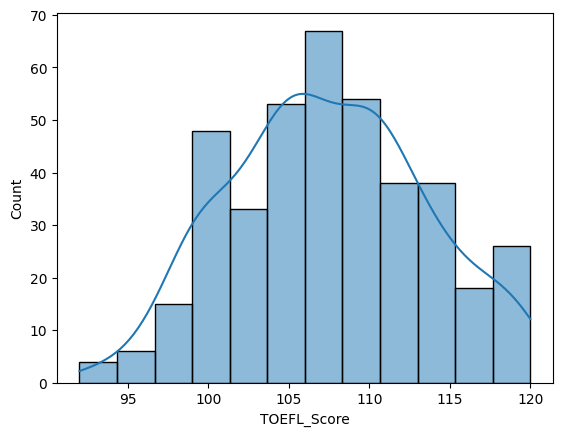

In [4]:
sns.histplot(data=data, x="TOEFL_Score", kde=True)

In [5]:

data = data.reset_index()
stats.normaltest(data["TOEFL_Score"])
# H0=je normální rozdělení,
# hladinu významnosti jsem stanovila na 0,05
# zamítám HO, protože p hodnota je nižší než hladina významnosti - není normální rozdělení

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

In [6]:
data_yes = data[data["Research"]==1]
data_no = data[data["Research"]==0]
print(data_yes["GRE_Score"].mean())
print(data_no["GRE_Score"].mean())
stats.ttest_ind(data_yes["GRE_Score"],data_no["GRE_Score"])
# HO=sloupec Research nemá vliv na výši skore
# hladinu významnosti jsem stanovila na 0,05
# zamítám HO, protože p hodnota je nižší než hladina významnosti - má vliv

322.85388127853884
309.49171270718233


TtestResult(statistic=14.218609390981028, pvalue=2.168740602699294e-37, df=398.0)

In [7]:
data.corr()
# korelace mezi GRE_Score a TOEFL_Score je 0,84 - korelace je vysoká (max je 1) a pozitivní - GRE_Score a TOEFL_Score se pohybují stejným směrem

,index,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
index,1.000000,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
Serial_No.,1.000000,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR_,-0.088221,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit_,0.042336,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


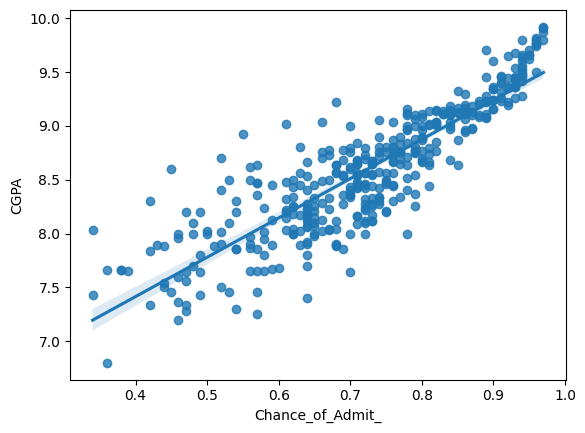

In [8]:
graf=sns.regplot(data,x="Chance_of_Admit_", y="CGPA")

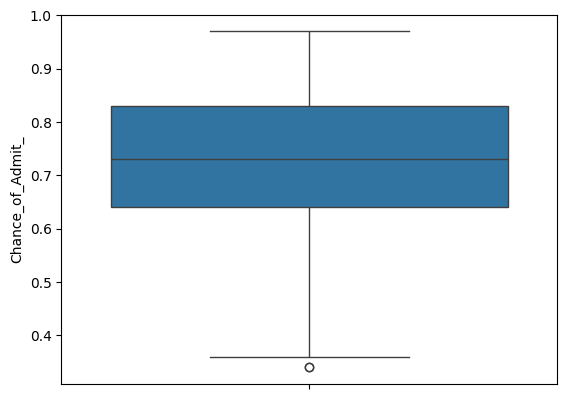

In [9]:
graf2=sns.boxplot(data["Chance_of_Admit_"])

In [10]:
data["Chance_of_Admit_"].min()

0.34

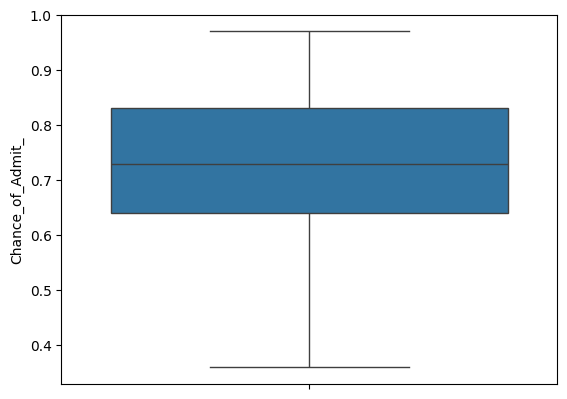

In [11]:
data=data[data["Chance_of_Admit_"]>=0.35]
graf3=sns.boxplot(data["Chance_of_Admit_"])


In [12]:
formula = "Chance_of_Admit_ ~ GRE_Score + TOEFL_Score + University_Rating + SOP + LOR_ + CGPA + Research"
mod = smf.ols(formula=formula, data=data)
results = mod.fit()
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]
data.head()

,index,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_,Cook Distance
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000383
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000811
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002403
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001627
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000098


<Axes: >

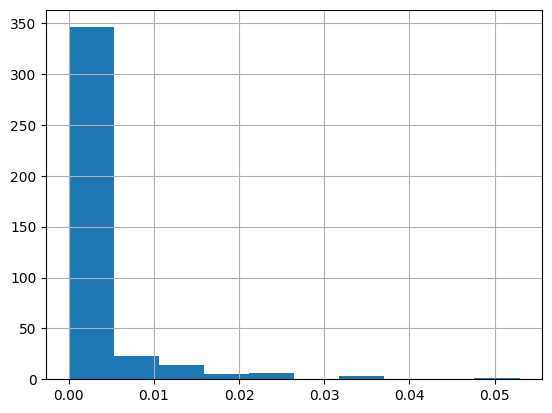

In [13]:
data['Cook Distance'].hist()
# není potřeba odstraňovat hodnoty, žádná hodnota nepřesahuje hodnotu 1

In [14]:

mod = smf.ols(formula=formula, data=data)
res = mod.fit()
res.summary()
# hl.významnosti 0,05, statisticky významné jsou:GRE_Skore, TOEFL_Skore, LOR_, CGPA, Research
# koeficienty - záporné hodnoty znamenají negativní korelaci, kladné pozitivní. 
# čím je abs hodnota koeficientu vyšší, tím větší má vliv na vysvětlovanou proměnnou
# největší vliv má CGPA
# kvalita modelu je vysoká, R-squared je 0,805 (tzn. vysvětluje 80% variability)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sat, 04 May 2024   Prob (F-statistic):          3.78e-134
Time:                        17:19:00   Log-Likelihood:                 542.56
No. Observations:                 398   AIC:                            -1069.
Df Residuals:                     390   BIC:                            -1037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2107      0.123     -9.855      0.000      -1.452      -0.969
GRE_Score             0.0017      0.001      2.843      0.005       0.001       0.003
TOEFL_Score           0.0026      0.001      2.467      0.014       0.001       0.005
University_Rating     0.0054      0.005      1.147      0.252      -0.004       0.015
SOP                  -0.0003      0.005     -0.063      0.950      -0.011       0.010
LOR_                  0.0210      0.005      3.861      0.000       0.010       0.032
CGPA                  0.1190      0.012      9.920      0.000       0.095       0.143
Research              0.0237      0.008      3.040      0.003       0.008       0.039
==============================================================================
Omnibus:                       88.327   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.308
Skew:                          -1.164   Prob(JB):                     9.50e-41
Kurtosis:                       5.386   Cond. No.                     1.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""